# <span style = "color: green"> Payment Fraud Detection </span>

***

Payment fraud occurs when someone steals another person's payment information and uses it to make unauthorized transactions or purchases. The actual cardholder or owner of the payment information then notices their account being used for transactions or purchases they did not authorize, and raises a dispute.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'payment_fraud.csv' dataset and store it in a DataFrame variable

In [2]:
df = pd.read_csv("payment_fraud.csv")

### View the top 5 rows

In [3]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


### View info about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


### View the basic statistical information about the dataset

In [5]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


### Check if there are any null values in the dataset

In [6]:
df.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

### View all the unique values in 'paymentMethod' column

In [7]:
df['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

### Create dummy variables for paymentMethod (OneHotEncoding)

In [8]:
newdf = pd.get_dummies(df, drop_first=True).astype(int)

In [9]:
newdf.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_paypal,paymentMethod_storecredit
0,29,1,4,28,0,1,0
1,725,1,4,0,0,0,1
2,845,1,4,0,0,0,0
3,503,1,4,0,0,0,0
4,2000,1,5,0,0,0,0


## <span style = "color:orange"> Visualization </span>

### Plot a pairplot of the dataframe

C:\Users\samee\desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


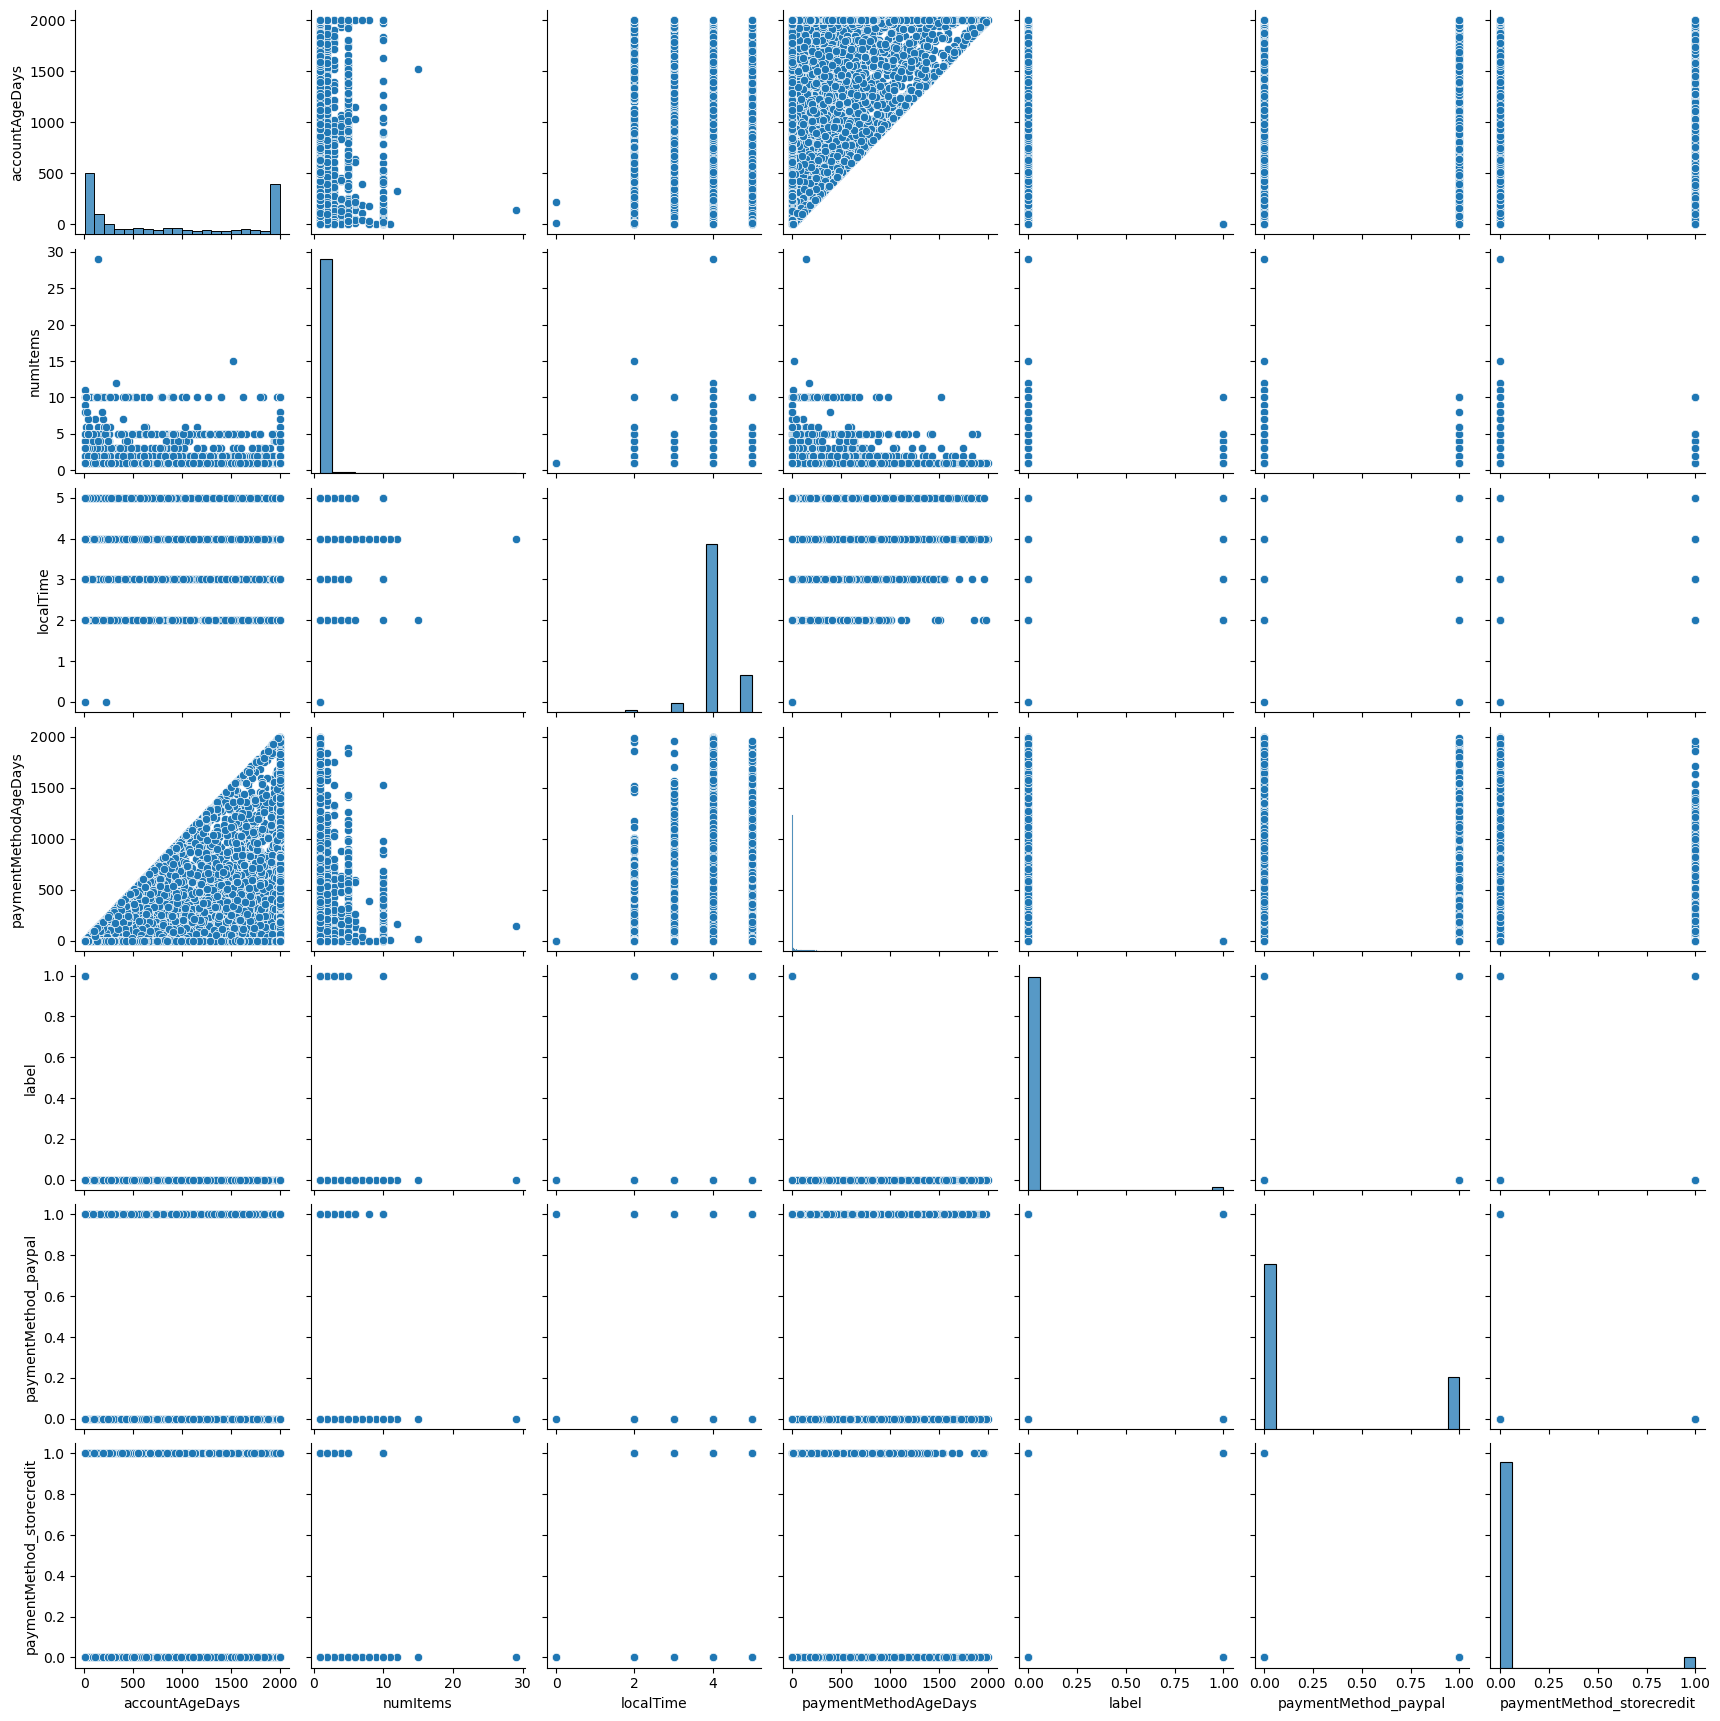

In [10]:
sns.pairplot(data=newdf)
plt.show()

### Split the dataset into input and Target variables(X and y)

In [11]:
x=newdf.drop(columns=['label'])
y=newdf['label']

### Standardise the dataset

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
x_scaled=scaler.fit_transform(x)

In [15]:
X=pd.DataFrame(data=x_scaled,columns=x.columns)

### Split the data into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [18]:
X_train

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_paypal,paymentMethod_storecredit
9679,-0.911511,-0.149500,-0.206126,0.002092,-0.557629,-0.226504
10127,-1.027071,-0.149500,-0.206126,-0.431857,-0.557629,-0.226504
6510,-0.367262,-0.149500,-0.206126,1.346276,-0.557629,-0.226504
8666,-0.106320,1.614506,-0.206126,-0.431857,-0.557629,-0.226504
19776,-0.803407,-0.149500,1.800941,-0.431857,-0.557629,-0.226504
...,...,...,...,...,...,...
6593,-0.745005,-0.149500,-0.206126,-0.431857,-0.557629,-0.226504
38472,1.419567,-0.149500,-0.206126,-0.160198,1.793308,-0.226504
31276,-0.977368,-0.149500,-0.206126,-0.431857,-0.557629,-0.226504
6916,0.938689,-0.149500,1.800941,-0.220174,-0.557629,4.414934


### Create a KNN Model and Train it with n_neigbors = 1

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model=KNeighborsClassifier()

In [21]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
KNeighborsClassifier()

KNeighborsClassifier()

In [23]:
#Train the model


### Check the score of our model

In [24]:
model.score(X_train,y_train)

0.9991258104465651

### Make predictions using X_test

In [25]:
y_pred=model.predict(X_test)

### Check accuracy score

In [26]:
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test,y_pred)


0.9986402651482961

### Create confusion matrix and classification report

In [28]:
#confusion matrix
metrics.confusion_matrix(y_test,y_pred)


array([[11595,     6],
       [   10,   156]], dtype=int64)

In [29]:
#classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11601
           1       0.96      0.94      0.95       166

    accuracy                           1.00     11767
   macro avg       0.98      0.97      0.98     11767
weighted avg       1.00      1.00      1.00     11767



### Choosing a K value

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [30]:
error_rate = []

# Will take some time:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


### Now create the following  plot to visualise the error rate

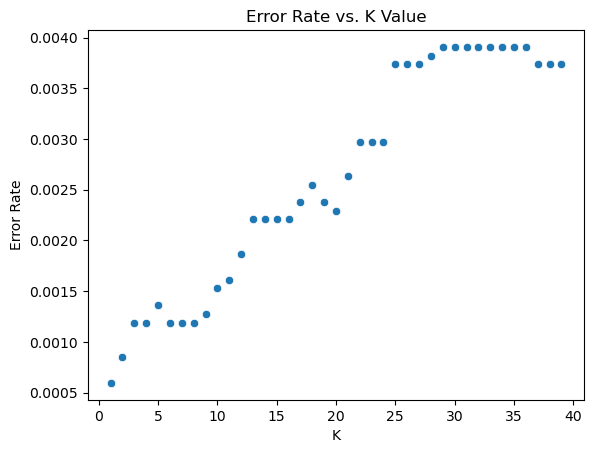

In [31]:
sns.scatterplot(x = range(1,40), y = error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### Retrain the model with new K value

WITH K=1


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11601
           1       0.96      0.99      0.98       166

    accuracy                           1.00     11767
   macro avg       0.98      1.00      0.99     11767
weighted avg       1.00      1.00      1.00     11767



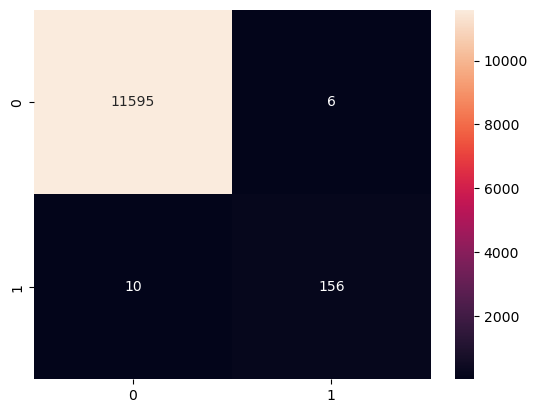

r2 score of our model is : 0.9584606710521273


In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(metrics.classification_report(y_test,pred))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

print('r2 score of our model is :', metrics.r2_score(pred, y_test))


***